### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,PredefinedSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

## Step 2. Data Exploration (Initial EDA and data cleaning)


### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
list1 = [i.lower() for i in df0.columns] 

In [6]:
df0.columns = list1 #converting all column names to lowercase, can use df.rename()

In [7]:
print(df0.columns)
df0.rename({'average_montly_hours':'average_monthly_hours'},axis = 'columns',inplace = True) #fixing column name misspell
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
df0[df0.duplicated()] #viewing duplicated items

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# removing duplicated items
df1 = df0.drop_duplicates(keep = 'first')

### Check outliers

Check for outliers in the data.

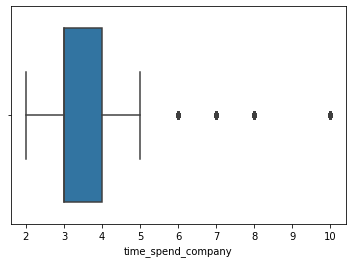

In [11]:
#dicovering outliers
sns.boxplot(data = df1, x = 'time_spend_company') 

In [12]:
# Determine the number of rows containing outliers
percentile_25 = df1['time_spend_company'].quantile(q = 0.25)
percentile_75 = df1['time_spend_company'].quantile(q = 0.75)
iqr = percentile_75 - percentile_25
lower_limit = percentile_25 - 1.5*iqr #finding lower limit for outliers
upper_limit = percentile_75 + 1.5*iqr #finding upper limit for outliers
print(lower_limit)
print(upper_limit)

df1[(df1['time_spend_company']<lower_limit) | (df1['time_spend_company']>upper_limit)] #applying a boolean mask to view outliers


1.5
5.5


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
#numbers of people who left vs. stayed
print(f'Number of people who stayed {df1["left"].value_counts()[1]} \nNumber of people who left {df1["left"].value_counts()[0]}')
print()
#percentages of people who left vs. stayed
print(f"Percentage of people who stayed {df1['left'].value_counts(normalize = True)[1]:.2f}% \nPercentage of people who left {df1['left'].value_counts(normalize = True)[0]:.2f}%")

Number of people who stayed 1991 
Number of people who left 10000

Percentage of people who stayed 0.17% 
Percentage of people who left 0.83%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 0, 'Number of Projects')

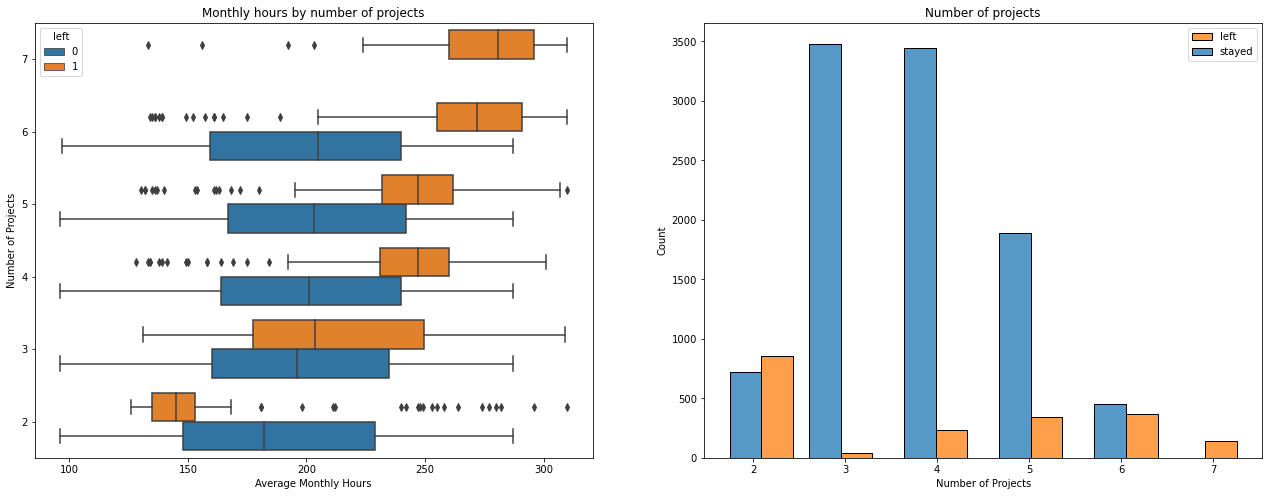

In [56]:
fig,ax = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project',hue = 'left', ax = ax[0],orient = 'h')
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Number of Projects')
#"orient" is important
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', ax = ax[1],shrink = 4)
ax[1].set_title('Number of projects')
ax[1].legend(labels = ['left','stayed'])
ax[1].set_xlabel('Number of Projects')
#shrink dictates size of the bars, basically bigger number = bigger bar

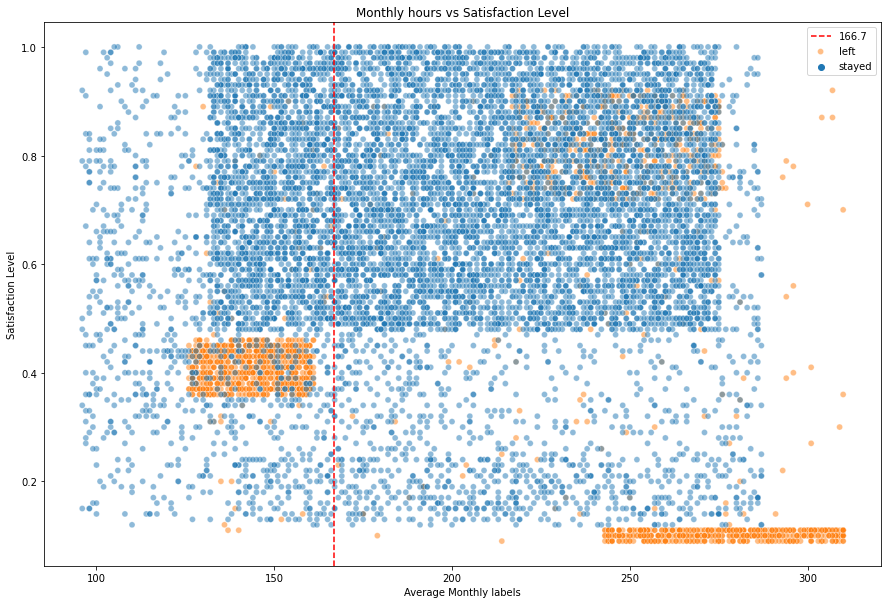

In [57]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.5)
plt.axvline(x=166.7, color='red', linestyle='--')
plt.legend(labels = ['166.7','left','stayed'])
plt.title("Monthly hours vs Satisfaction Level")
plt.xlabel('Average Monthly labels')
plt.ylabel('Satisfaction Level')
plt.show()


Text(0.5, 0, 'Time spent in Company')

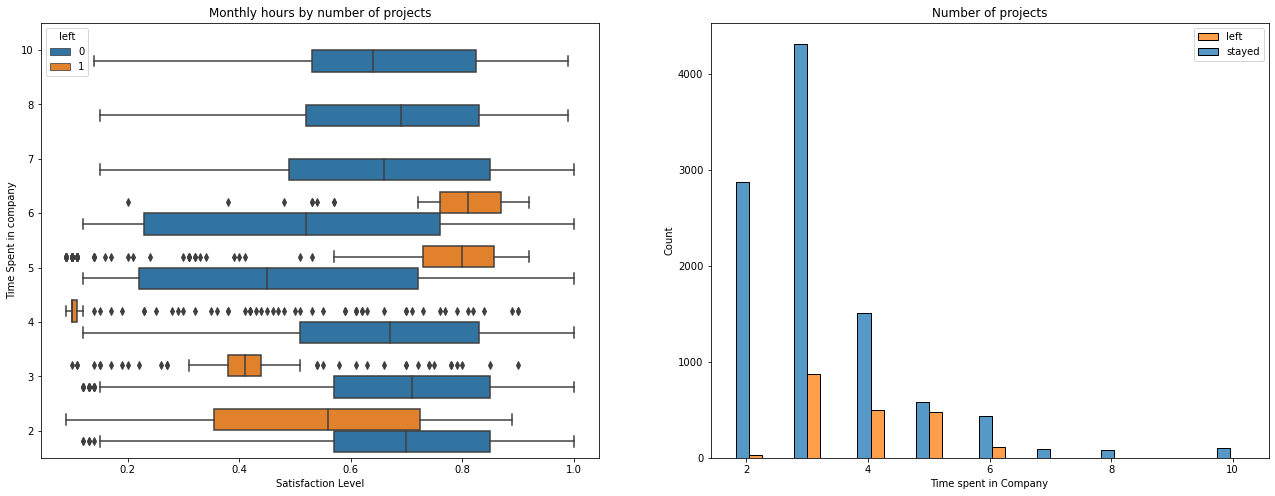

In [58]:
fig,ax = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'time_spend_company',hue = 'left', ax = ax[0],orient = 'h')
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')
ax[0].set_xlabel('Satisfaction Level')
ax[0].set_ylabel('Time Spent in company')

sns.histplot(data = df1, x = 'time_spend_company', hue = 'left', multiple = 'dodge', ax = ax[1],shrink = 5)
ax[1].set_title('Number of projects')
ax[1].legend(labels = ['left','stayed'])
ax[1].set_xlabel('Time spent in Company')

In [18]:
df1.groupby(['left']).agg({'satisfaction_level':['mean','median']}).set_axis(['stayed','left'],axis = 'index')
#comparison of mean in satisfaction level for employees who stayed vs left

satisfaction_level       
                     mean median
stayed           0.667365   0.69
left             0.440271   0.41

Text(0.5, 0, 'Time Spent in Company')

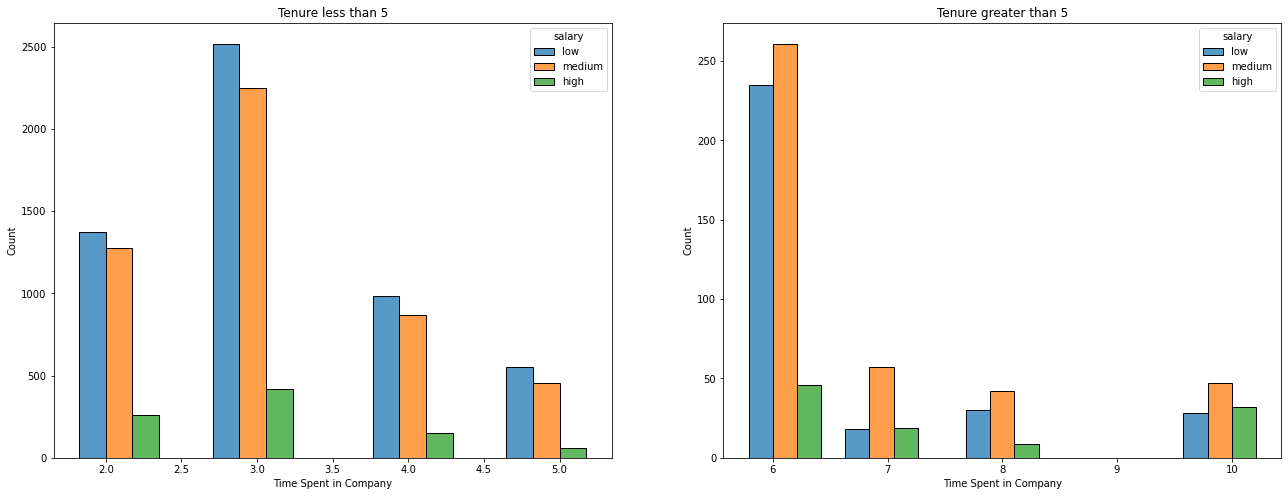

In [59]:
fig,ax = plt.subplots(1,2, figsize = (22,8))
sns.histplot(data = df1[df1['time_spend_company']<6], x = 'time_spend_company', hue = 'salary', 
             hue_order = ['low','medium','high'], multiple = 'dodge', shrink = 3, ax = ax[0])
ax[0].set_title('Tenure less than 5')
ax[0].set_xlabel('Time Spent in Company')
sns.histplot(data = df1[df1['time_spend_company']>5], x = 'time_spend_company', hue = 'salary', 
             hue_order = ['low','medium','high'], multiple = 'dodge', shrink = 3, ax = ax[1])
ax[1].set_title('Tenure greater than 5')
ax[1].set_xlabel('Time Spent in Company')

Text(0, 0.5, 'Last Evalutation')

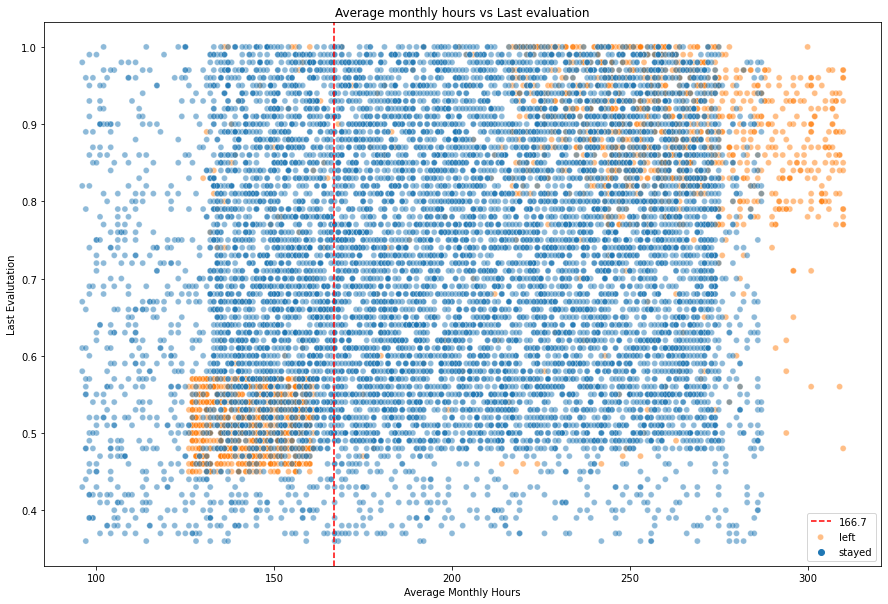

In [60]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.5)
plt.axvline(x=166.7, color='red', linestyle='--')
plt.legend(labels = ['166.7','left','stayed'])
plt.show
plt.title('Average monthly hours vs Last evaluation')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evalutation')

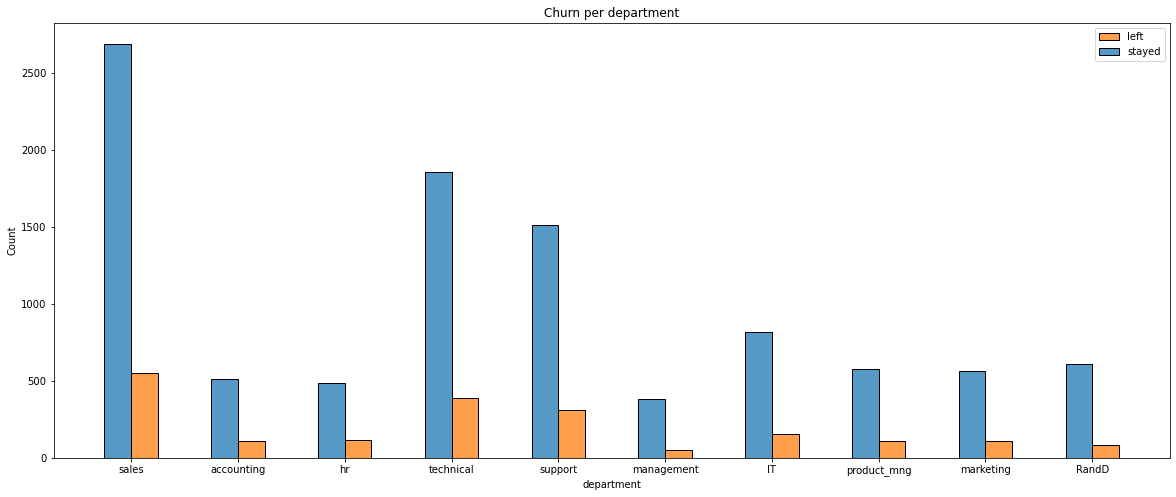

In [21]:
plt.figure(figsize = (20,8))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge',shrink = 0.5)
plt.title('Churn per department')
plt.legend(labels = ['left','stayed'])

Text(0.5, 1.0, 'Correlation heatmap')

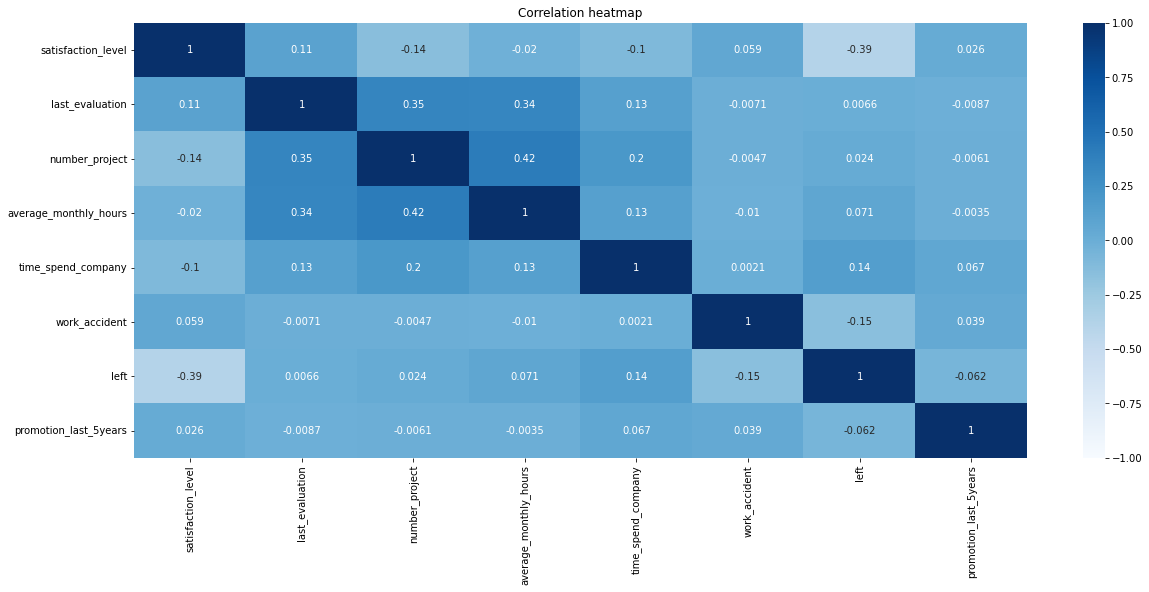

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (20,8))
sns.heatmap(data = df0.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Blues')
plt.title("Correlation heatmap")

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
#df_test = df1.copy()

#df_test['salary'] = pd.Categorical(df_test['salary'], ordered = True, categories = ['low','medium','high']).codes
#df_test.head()

In [24]:
df_enc = df1.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category')  # Convert to categorical (if not already)
    .cat.set_categories(['low', 'medium', 'high'])  # Just updates category order
    .cat.codes  # Get numerical codes
)

In [25]:
df_enc = pd.get_dummies(df_enc,drop_first=False)

In [26]:
df_enc = df_enc[(df_enc['time_spend_company']>=lower_limit) & (df_enc['time_spend_company']<=upper_limit)]

In [27]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
Y = df_enc['left']
X = df_enc.copy()
X = X.drop('left',axis = 1)

**LOGISTIC REGRESSION**

In [29]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.25,random_state = 42, stratify = Y)

In [30]:
clf = LogisticRegression(random_state = 42, max_iter=500).fit(Xtrain,Ytrain)

In [31]:
y_pred = clf.predict(Xtest)

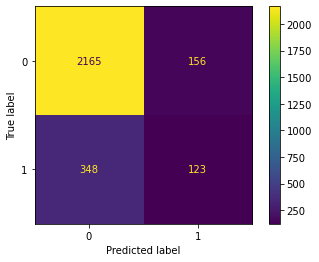

In [32]:
cm = confusion_matrix(Ytest,y_pred,labels = clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels = clf.classes_)
disp.plot(values_format='d')


**DECISION TREE**

In [33]:
tree_clf = DecisionTreeClassifier(random_state = 42)

In [34]:
param = {
    'max_depth':[3, 5, 10, None], 
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [1, 2, 4],
}
scoring = ['accuracy','f1','recall','precision']
tree_grid = GridSearchCV(tree_clf,param_grid = param, scoring = scoring,cv = 5,refit = 'f1' )
tree_grid.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, None],
                        

In [35]:
#function to display performance metrics of best estimator in a table
def make_table(clf, name, score):
    scoring = {
        'f1':'mean_test_f1',
        'precision':'mean_test_precision',
        'accuracy':'mean_test_accuracy',
        'recall':'mean_test_recall'
    }
    cv_results = pd.DataFrame(clf.cv_results_)
    results = cv_results.iloc[cv_results[scoring[score]].idxmax()]
    f1 = results.mean_test_f1
    precision = results.mean_test_precision
    recall = results.mean_test_recall
    accuracy = results.mean_test_accuracy
    table = pd.DataFrame([{'Name':name,
                         'Precision':precision,
                         'Accuracy':accuracy,
                         'Recall':recall,
                         'F1':f1}])
    return table
    


In [36]:
tree_table = make_table(tree_grid,'Tree classifier','f1')

In [37]:
tree_table

,Name,Precision,Accuracy,Recall,F1
0,Tree classifier,0.965702,0.980179,0.914936,0.939526


In [38]:
#function to display performance metrics of best estimator on test set
def pred_scores(clf,name,Xtest = None,Ytest = None):
    if Xtest is None or Ytest is None:
        raise ValueError("Xtest and Ytest must be provided.")
    best_est = clf.best_estimator_
    Ypred = best_est.predict(Xtest)
    print(name.upper() +" PREDICTION PERFORMANCE")
    cm = confusion_matrix(Ytest,Ypred,labels = best_est.classes_)
    disp = ConfusionMatrixDisplay(cm,display_labels = best_est.classes_)
    disp.plot(values_format='d')
    print(f"Accuracy = {accuracy_score(Ytest,Ypred):.4f}")
    print(f"Recall = {recall_score(Ytest,Ypred):.4f}")
    print(f"Precision = {precision_score(Ytest,Ypred):.4f}")
    print(f"F1 = {f1_score(Ytest,Ypred):.4f}")

DECISION TREE PREDICTION PERFORMANCE
Accuracy = 0.9842
Recall = 0.9278
Precision = 0.9776
F1 = 0.9521


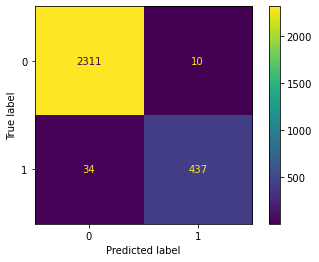

In [39]:
pred_scores(tree_grid,'Decision Tree',Xtest,Ytest)

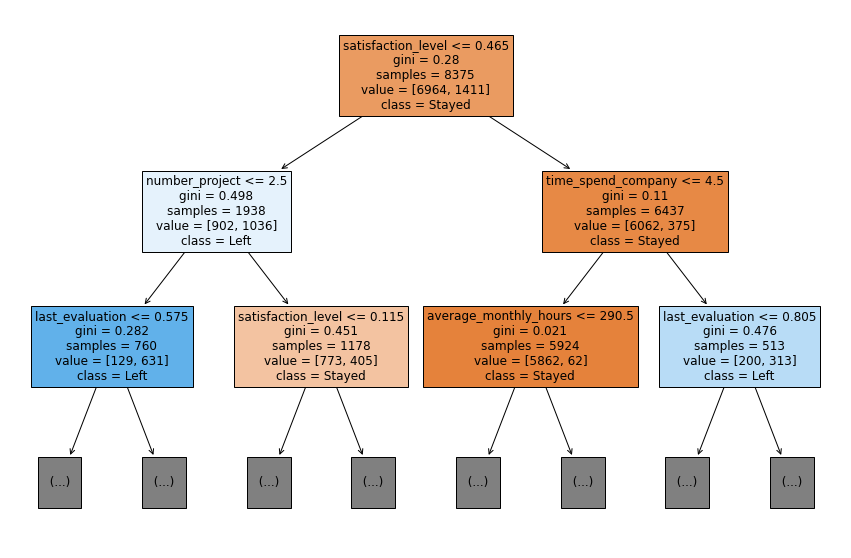

In [40]:
plt.figure(figsize=(15, 10))
plot_tree(tree_grid.best_estimator_,max_depth = 2, feature_names = df_enc.columns, class_names = {0:'Stayed',1:'Left'},
        fontsize = 12, filled = True);

**RANDOM FOREST**

In [ ]:
xtrain,xval,ytrain,yval = train_test_split(Xtrain,Ytrain,test_size = 0.25,random_state = 42, stratify = Ytrain)

split = [0 if x in xval.index else -1 for x in Xtrain.index]
custom_split = PredefinedSplit(split)

In [43]:
%%time
random_clf = RandomForestClassifier(random_state = 42)
param_random = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
scoring = ['accuracy','f1','recall','precision']
random_grid = GridSearchCV(random_clf,param_grid = param_random, scoring = scoring,cv = custom_split, refit = 'f1',n_jobs = -1)
random_grid.fit(Xtrain,Ytrain)

CPU times: user 5.8 s, sys: 348 ms, total: 6.15 s
Wall time: 5min 18s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weig...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [44]:
All_Results = pd.concat([tree_table,make_table(random_grid,'Random Forest','f1')],ignore_index = True)

In [45]:
All_Results

,Name,Precision,Accuracy,Recall,F1
0,Tree classifier,0.965702,0.980179,0.914936,0.939526
1,Random Forest,0.990683,0.982330,0.903683,0.945185


RANDOM FOREST PREDICTION PERFORMANCE
Accuracy = 0.9878
Recall = 0.9342
Precision = 0.9932
F1 = 0.9628


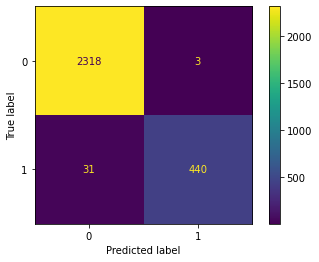

In [46]:
pred_scores(random_grid,'Random Forest',Xtest,Ytest)

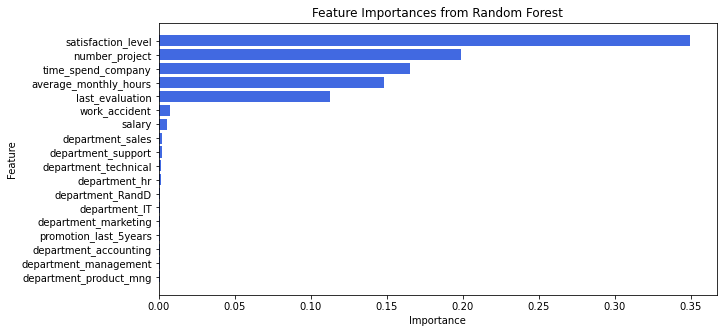

In [47]:
feature_importances = random_grid.best_estimator_.feature_importances_

# Convert to a DataFrame for better visualization
feat_importances = pd.DataFrame({
    "Feature": Xtrain.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.barh(feat_importances["Feature"], feat_importances["Importance"], color="royalblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

**XGBOOST**

In [48]:
%%time
xgboost = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             } 
scoring = ['accuracy','f1','recall','precision']
xgboost_grid = GridSearchCV(xgboost,param_grid = cv_params, scoring = scoring,cv = custom_split, refit = 'f1',n_jobs = -1)
xgboost_grid.fit(Xtrain,Ytrain)

CPU times: user 8min 1s, sys: 0 ns, total: 8min 1s
Wall time: 6min 5s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     i...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
        

In [49]:
All_Results = pd.concat([All_Results,make_table(xgboost_grid,'XGboost','f1')],ignore_index = True)

In [50]:
All_Results

,Name,Precision,Accuracy,Recall,F1
0,Tree classifier,0.965702,0.980179,0.914936,0.939526
1,Random Forest,0.990683,0.982330,0.903683,0.945185
2,XGboost,0.990654,0.981853,0.900850,0.943620


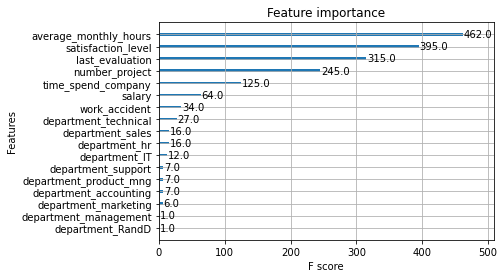

In [51]:
#plotting feature importance for XGBoost model
plot_importance(xgboost_grid.best_estimator_)